<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проект:-Дашборд-для-Яндекс.Дзен" data-toc-modified-id="Проект:-Дашборд-для-Яндекс.Дзен-1">Проект: Дашборд для Яндекс.Дзен</a></span><ul class="toc-item"><li><span><a href="#1-Введение" data-toc-modified-id="1-Введение-1.1">1 Введение</a></span><ul class="toc-item"><li><span><a href="#1.1-Клиент" data-toc-modified-id="1.1-Клиент-1.1.1">1.1 Клиент</a></span></li><li><span><a href="#1.2-Цель" data-toc-modified-id="1.2-Цель-1.1.2">1.2 Цель</a></span></li><li><span><a href="#1.3-Планируемые-этапы-работы" data-toc-modified-id="1.3-Планируемые-этапы-работы-1.1.3">1.3 Планируемые этапы работы</a></span></li></ul></li><li><span><a href="#2-Техническое-задание" data-toc-modified-id="2-Техническое-задание-1.2">2 Техническое задание</a></span></li><li><span><a href="#3-Подключение-к-базе-и-выгрузка-данных" data-toc-modified-id="3-Подключение-к-базе-и-выгрузка-данных-1.3">3 Подключение к базе и выгрузка данных</a></span></li><li><span><a href="#4-Подготовленные-материалы" data-toc-modified-id="4-Подготовленные-материалы-1.4">4 Подготовленные материалы</a></span><ul class="toc-item"><li><span><a href="#4.1-Дашборд-Tableau" data-toc-modified-id="4.1-Дашборд-Tableau-1.4.1">4.1 Дашборд Tableau</a></span></li><li><span><a href="#4.2-Дашборд-Datalens" data-toc-modified-id="4.2-Дашборд-Datalens-1.4.2">4.2 Дашборд Datalens</a></span></li><li><span><a href="#4.3-Презентация" data-toc-modified-id="4.3-Презентация-1.4.3">4.3 Презентация</a></span></li></ul></li></ul></li></ul></div>

# Проект: Дашборд для Яндекс.Дзен

## 1 Введение

### 1.1 Клиент

Менеджеры по анализу контента

Запрос:
- Получение отчетов в виде визуализаций
- Ответы по вопросам:
    - Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
    - Как много карточек генерируют источники с разными темами?
    - Как соотносятся темы карточек и темы источников?
    


### 1.2 Цель

- Подготовить дашборд по ТЗ
- Ответить на вопросы менеджеров, используя дашборд


### 1.3 Планируемые этапы работы

- Подключиться к базе данных
- Выгрузить необходимые данные
- В Tableau Public на основе выгруженых данных сформировать дашборд в соответствии с ТЗ
- Подготовить презентацию по вопросам заказчика



## 2 Техническое задание

- Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;
- Состав данных для дашборда:
    - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
    - Разбивка событий по темам источников;
    - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
    - Дата и время;
    - Тема карточки;
    - Тема источника;
    - Возрастная группа;
- Характер данных:
    - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
    - Разбивка событий по темам источников — относительные величины (% событий);
    - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: cырые данные о событиях взаимодействия пользователей с карточками (таблица log_raw);
- База данных, в которой будут храниться агрегированные данные: дополнительные агрегированные таблицы в БД zen;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

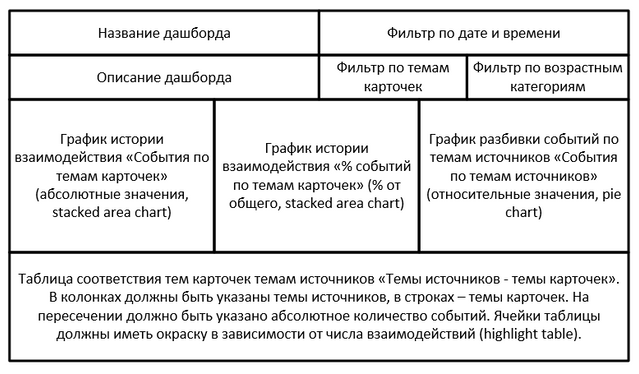

In [1]:
# Загрузка макет дашборда

import urllib.request
from PIL import Image
  
urllib.request.urlretrieve('https://i.ibb.co/hB0ywmg/Dash.png', "Dash.png")
  
img = Image.open("Dash.png")
img.show()

## 3 Подключение к базе и выгрузка данных

In [2]:
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': '@@@@@@@@', # пароль
            'host': '@@@@.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst@@@'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

# Подключаемся к БД.
engine = create_engine(connection_string)

# Формируем sql-запрос.
query = ''' SELECT *
            FROM dash_visits
        '''
# Выполняем запрос и сохраняем результат
dash_visits = pd.io.sql.read_sql(query, con=engine)

print(dash_visits.head(5))

   record_id item_topic source_topic age_segment                  dt  visits
0    1040597     Деньги         Авто       18-25 2019-09-24 18:32:00       3
1    1040598     Деньги         Авто       18-25 2019-09-24 18:35:00       1
2    1040599     Деньги         Авто       18-25 2019-09-24 18:54:00       4
3    1040600     Деньги         Авто       18-25 2019-09-24 18:55:00      17
4    1040601     Деньги         Авто       18-25 2019-09-24 18:56:00      27


In [3]:
# Сохраняем данные в файл
dash_visits.to_csv('dash_visits.csv')

## 4 Подготовленные материалы

### 4.1 Дашборд Tableau

https://public.tableau.com/app/profile/gary4596/viz/Dash1_16677476097390/Dashboard1

### 4.2 Дашборд Datalens

https://datalens.yandex.ru/e13t83bcu91m5-dash-kartochki-dzen

### 4.3 Презентация

https://disk.yandex.ru/i/e2wBIHqox9pFfw